# Movie class demo
The demo walks you through the key features of the ccfepyutils movie class.

Before running this make sure you have ccfepyutils installed/in your python path.  
You will also need approprate movie settings files in your local directory "~/.ccfepytools/settings/". (Template versions of these files should be coppied there automatically when you first import ccfepyutils.)

## Getting started
First we import the class.

In [1]:
from ccfepyutils.classes.movie import Movie

# Supress logging messages
import ccfepyutils
import logging
ccfepyutils.classes.movie.logger.setLevel(logging.CRITICAL)
ccfepyutils.classes.settings.logger.setLevel(logging.CRITICAL)
ccfepyutils.classes.data_stack.logger.setLevel(logging.WARNING)
ccfepyutils.classes.plot.logger.setLevel(logging.WARNING)
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Now we can instanciate the class by setting the movie file we want to read. We can name this movie instance 'Movie_demo' so we can keep track of what movies we are working with. This will load meta data, but not frame data.  
*NOTE: There must be a `Movie_data_locations` settings file in place in order to correctly locate the movie data for this machine and camera.*

<small>(We could also specify frame ranges and enhancements etc. here, but we'll keep things simple and do it in steps)

In [2]:
pulse = 29852
machine = 'MAST'
camera = 'SA1.1'

movie = Movie(pulse, machine, camera, name='Movie_demo');
movie

<Movie "Movie_demo" 2x(160, 256), enhanced=False>

## Accessing meta data
Now we can look at the structure of the mraw file

In [3]:
movie._movie_meta['mraw_files']

,StartFrame,EndFrame,TotalFrame,StartTime,EndTime,TotalTime
0,0,4999,5000,0.10001,0.15001,0.05000
1,5000,9999,5000,0.15001,0.20001,0.05000
2,10000,14999,5000,0.20001,0.25001,0.05000
3,15000,19999,5000,0.25001,0.30001,0.05000
4,20000,24999,5000,0.30001,0.35001,0.05000
5,25000,27000,2001,0.35001,0.37003,0.02002


If you look at the frame meta data you'll notice the frame range has been set acording to previously set mvoie_range settings but the frame data has not been loaded - the 'set' column below is all False

In [4]:
movie._meta

,i,n,set,t,enhanced
n,,,,,
0,0,0,False,0.10001,False
1,1,1,False,0.10002,False


All movie settings always have a value, so if you do not set them, they will assume default values/the values used previously

In [5]:
movie.settings.view()

,value,description,setting
index,,,
Movie_source,synthcam_demo,Settings detailing origin of movie data,True
machine,MAST,Machine/Tokamak,False
camera,SA1.1,Camera used to produce movie,False
pulse,29852,Pulse number/Synthetic dataset,False
Enhancer_settings,default,nan,True
enhancements:0,extract_fg,nan,False
enhancements:1,reduce_noise,nan,False
enhancements:2,sharpen,nan,False
Movie_range,repeat,Settings detailing range of frames to be loaded,True


## Setting the frame range
Now lets set the frame range we want to work with we want to work with and allocate the memory for that many frames. Note this is modifying the values of the Movie_range settings file.

In [21]:
start_frame = 13
end_frame = 25
movie.set_frames(start_frame=start_frame, end_frame=end_frame)
movie

<Movie "Movie_demo" 13x(160, 256), enhanced=True>

Now the frame meta data has been updated acordingly, and again no frames are set (no frame data has been loaded).

In [7]:
movie._meta

,i,n,set,t,enhanced
n,,,,,
13,0,13,False,0.10014,False
14,1,14,False,0.10015,False
15,2,15,False,0.10016,False
16,3,16,False,0.10017,False
17,4,17,False,0.10018,False
18,5,18,False,0.10019,False
19,6,19,False,0.10020,False
20,7,20,False,0.10021,False
21,8,21,False,0.10022,False


## Accessing frame data
Now lets get a frame object for frame 16. The `repr` tells us what movie the frame is from, the image resolution and the frame number and frame time.

In [8]:
frame16 = movie(n=16)
frame16

<Frame("Movie_demo") (160, 256)[n=16, t=0.10017s]>

Now if we access the frames data the frame data will be read from disk on the fly and we will get an xarray dataset. This is a view of the dataset containing the whole movie.

In [9]:
frame16.data

<xarray.DataArray 'pix_intensity' (x_pix: 160, y_pix: 256)>
array([[ 524.,  456.,  516., ...,   80.,   28.,   12.],
       [ 456.,  544.,  528., ...,   56.,    0.,    0.],
       [ 464.,  464.,  560., ...,   96.,   24.,   40.],
       ..., 
       [ 116.,   96.,   92., ...,    8.,    4.,    8.],
       [  44.,   80.,   88., ...,    0.,   48.,    0.],
       [  72.,   80.,   24., ...,    8.,   64.,    4.]])
Coordinates:
    n        int64 16
  * x_pix    (x_pix) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * y_pix    (y_pix) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

Or if you want the underlying numpy ndarray just access the dataset's values

In [10]:
frame16.data.values

array([[ 524.,  456.,  516., ...,   80.,   28.,   12.],
       [ 456.,  544.,  528., ...,   56.,    0.,    0.],
       [ 464.,  464.,  560., ...,   96.,   24.,   40.],
       ..., 
       [ 116.,   96.,   92., ...,    8.,    4.,    8.],
       [  44.,   80.,   88., ...,    0.,   48.,    0.],
       [  72.,   80.,   24., ...,    8.,   64.,    4.]])

Now we can see the data for frame16 has been 'set'

In [11]:
movie._meta

,i,n,set,t,enhanced
n,,,,,
13,0,13,False,0.10014,False
14,1,14,False,0.10015,False
15,2,15,False,0.10016,False
16,3,16,True,0.10017,False
17,4,17,False,0.10018,False
18,5,18,False,0.10019,False
19,6,19,False,0.10020,False
20,7,20,False,0.10021,False
21,8,21,False,0.10022,False


If we want to load all the frames into memory we can call `movie.load_movie_data()` or load a subset of the frames using `movie.load_movie_data(n=my_list_of_frames)`.

## Plotting frames
Now lets plot the 11th frame in the movie (ie frame24 with i=11, n=24)

<Plot(1, 1);0:"image">

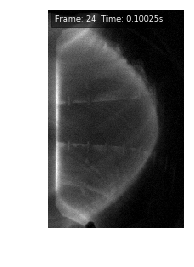

In [12]:
frame24 = movie(i=11)
frame24.plot()

# Enhancing frames
Now lets enhance this frame by extracting the forground, then applying a gaussian but, then a sharpenning opperation and plot it

In [13]:
movie.enhance(['extract_fg', 'reduce_noise', 'sharpen'], frames=[24], keep_raw=True)

Now we can see in the frame meta data that frame 24 has been enhanced 

In [14]:
movie._meta

,i,n,set,t,enhanced
n,,,,,
13,0,13,False,0.10014,False
14,1,14,False,0.10015,False
15,2,15,False,0.10016,False
16,3,16,True,0.10017,False
17,4,17,False,0.10018,False
18,5,18,False,0.10019,False
19,6,19,False,0.10020,False
20,7,20,False,0.10021,False
21,8,21,False,0.10022,False


<Plot(1, 1);0:"image">

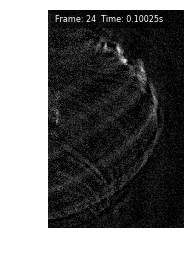

In [15]:
frame24 = movie(i=11)
frame24.plot()

Now we can load and enhance the rest of the frames

In [16]:
movie.enhance(['extract_fg', 'reduce_noise', 'sharpen'], frames='all', keep_raw=True)
movie._meta

,i,n,set,t,enhanced
n,,,,,
13,0,13,True,0.10014,True
14,1,14,True,0.10015,True
15,2,15,True,0.10016,True
16,3,16,True,0.10017,True
17,4,17,True,0.10018,True
18,5,18,True,0.10019,True
19,6,19,True,0.10020,True
20,7,20,True,0.10021,True
21,8,21,True,0.10022,True


## Accessing raw data
We can still access the raw data because we set `keep_raw` when we applied the enhancements. Note here we are indexing the movie with the frame time.

[[ 440.  476.  556. ...,   64.   20.   24.]
 [ 452.  496.  544. ...,   44.   40.   28.]
 [ 472.  524.  504. ...,  124.   36.    8.]
 ..., 
 [  96.   64.   48. ...,    0.    0.   40.]
 [  64.   92.   40. ...,    0.    0.    0.]
 [  88.   96.    8. ...,   12.   24.    4.]]

[[ 440.  476.  556. ...,   64.   20.   24.]
 [ 452.  496.  544. ...,   44.   40.   28.]
 [ 472.  524.  504. ...,  124.   36.    8.]
 ..., 
 [  96.   64.   48. ...,    0.    0.   40.]
 [  64.   92.   40. ...,    0.    0.    0.]
 [  88.   96.    8. ...,   12.   24.    4.]]


<Plot(1, 1);0:"image">

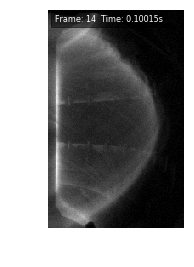

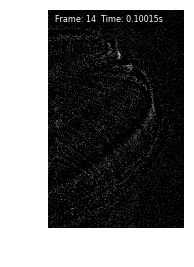

In [17]:
print(movie(t=0.10015, raw=True).data.values)  
print() # Or you can get the raw data from the frame object:
print(movie(t=0.10015).raw.data.values)
movie(t=0.10015, raw=True).plot()
movie(t=0.10015).plot()

## Accessing data for the whole movie
The full 3D data set can be accessed through `.data`. As usual `movie.data.values` will give you the numpy array.

In [18]:
movie.data

<xarray.DataArray 'pix_intensity' (n: 13, x_pix: 160, y_pix: 256)>
array([[[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]],

       [[ 12.,   0., ...,   0.,  12.],
        [  0.,   0., ...,  32.,   8.],
        ..., 
        [ 36.,  28., ...,   0.,   0.],
        [ 12.,  16., ...,   0.,   0.]],

       ..., 
       [[ 32.,  36., ...,  24.,  40.],
        [ 12.,   8., ...,   8.,   8.],
        ..., 
        [  0.,   0., ...,   4.,   0.],
        [ 36.,  32., ...,  48.,  24.]],

       [[ 44.,  12., ...,   8.,  20.],
        [  0.,   0., ...,  24.,  44.],
        ..., 
        [  0.,  32., ...,  36.,   0.],
        [ 20.,   0., ...,  40.,  16.]]])
Coordinates:
  * n        (n) int64 13 14 15 16 17 18 19 20 21 22 23 24 25
  * x_pix    (x_pix) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * y_pix    (y_pix) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

The raw (unenhanced) data can accessed with `.raw_data`

In [19]:
movie.raw_data

<xarray.DataArray 'pix_intensity' (n: 13, x_pix: 160, y_pix: 256)>
array([[[ 428.,  492., ...,   44.,   12.],
        [ 476.,  580., ...,    8.,   20.],
        ..., 
        [  28.,   64., ...,   24.,    0.],
        [  76.,   80., ...,   24.,    8.]],

       [[ 440.,  476., ...,   20.,   24.],
        [ 452.,  496., ...,   40.,   28.],
        ..., 
        [  64.,   92., ...,    0.,    0.],
        [  88.,   96., ...,   24.,    4.]],

       ..., 
       [[ 440.,  428., ...,   24.,   40.],
        [ 424.,  504., ...,    8.,    8.],
        ..., 
        [  44.,   44., ...,    4.,    0.],
        [  96.,   88., ...,   56.,   28.]],

       [[ 452.,  404., ...,    8.,   20.],
        [ 404.,  480., ...,   24.,   44.],
        ..., 
        [  24.,   76., ...,   40.,    0.],
        [  80.,   44., ...,   48.,   20.]]])
Coordinates:
  * n        (n) int64 13 14 15 16 17 18 19 20 21 22 23 24 25
  * x_pix    (x_pix) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * y_pix   

## Misc
Some other useful movie attributes include (Yes _underscores aren't consistent yet!):

In [20]:
print('Number of frames: {}\n'.format(movie.nframes))
print('Frame numbers: {}\n'.format(movie.frame_numbers))
print('Frame times: {}\n'.format(movie.frame_times))
print('Frame ramge: {}\n'.format(movie._frame_range))
print('Movie file path (for fist frame/file): {}\n'.format(movie.fn_path_0))

movie_meta = movie._movie_meta
movie_meta.pop('mraw_header')
mraw_meta = movie_meta['mraw_files']
movie_meta.pop('mraw_files')
print('Movie header meta data (reduced):\n{}'.format(movie_meta))

Number of frames: 13

Frame numbers: [13 14 15 16 17 18 19 20 21 22 23 24 25]

Frame times: [ 0.10014  0.10015  0.10016  0.10017  0.10018  0.10019  0.1002   0.10021
  0.10022  0.10023  0.10024  0.10025  0.10026]

Frame ramge: {'frame_range': array([13, 25]), 'n': 13, 'stride': 1, 'frames': array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]), 't_range': array([ 0.10014,  0.10026]), 't': array([ 0.10014,  0.10015,  0.10016,  0.10017,  0.10018,  0.10019,
        0.1002 ,  0.10021,  0.10022,  0.10023,  0.10024,  0.10025,  0.10026])}

Movie file path (for fist frame/file): /home/tfarley/OneDrive/10-Data/fast_camera_data/MAST/SA1/29852/C001H001S0001/C001H001S0001-00.mraw

Movie header meta data (reduced):
{'format': '.mraw', 'movie_format': '.mraw', 'frame0': 20000, 'frame_range': [0, 27000], 't_range': [0.10001, 0.37002999999999997], 'frame_shape': (160, 256), 'fps': 100000}


Hopefully you now know enough to start using the movie class! More functinality coming soon!